## iris dataset for EDA

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris=load_iris()
iris_dataframe=pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
# y컬럼 추가
iris_dataframe['group']=pd.Series([iris.target_names[k] for k in iris.target], dtype="category")
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 통계량 확인

In [7]:
#평균값
#numeric_only : int/float 열만 포함하겠다는 의미
print(iris_dataframe.mean(numeric_only=True))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [8]:
#중앙값
print(iris_dataframe.median(numeric_only=True))

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


In [9]:
#표준편차
print(iris_dataframe.std())

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_20356/3429416048.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(iris_dataframe.std())


In [10]:
#최소, 최대개밧 사이의 범위
print(iris_dataframe.max(numeric_only=True)-iris_dataframe.min(numeric_only=True))

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


In [11]:
#Quantiles(2분위수, 3분위수, 4분위수)
print(iris_dataframe.quantile([0, .25, .50, .75, 1]))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3               2.0               1.00               0.1
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8
1.00                7.9               4.4               6.90               2.5


In [12]:
#기술통계량 한번에 보기
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA : Visualizations

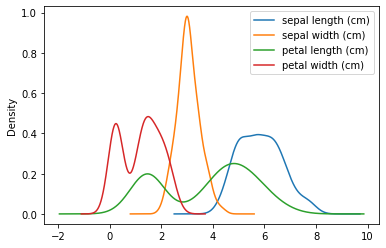

In [16]:
#데이터값의 밀도를 살펴보기
#연속적인 값이기 때문에 density plot
cols=iris_dataframe.columns[:4]
densityplot=iris_dataframe[cols].plot(kind='density')

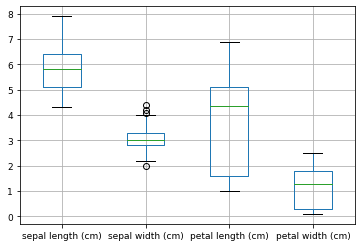

In [19]:
#box plot
boxplots=iris_dataframe.boxplot(fontsize=9)

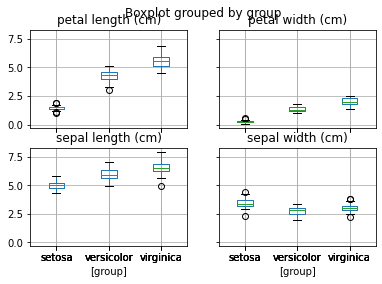

In [22]:
from matplotlib import pyplot as plt
#y에 대해서 boxplot
#group컬럼에 대해서
iris_dataframe.boxplot(by='group')
plt.show()

## 귀무가설/대립가설

In [26]:
# 그룹별 Sepal_length 내에서 통계적으로 유의미한 차이가 있는지 확인
# F:119.265, p: 0.000
from scipy.stats import f_oneway
variable=iris_dataframe['sepal length (cm)']
group0=iris_dataframe['group']=='setosa'
group1=iris_dataframe['group']=='versicolor'
group2=iris_dataframe['group']=='virginica'
variable=iris_dataframe['sepal length (cm)']
f, pvalue=f_oneway(variable[group0], variable[group1], variable[group2])
print('One-way ANOVA F-value %.3f p-value %0.3f' % (f, pvalue))
#3개의 평균 중 적어도 하나는 다르다

One-way ANOVA F-value 119.265 p-value 0.000


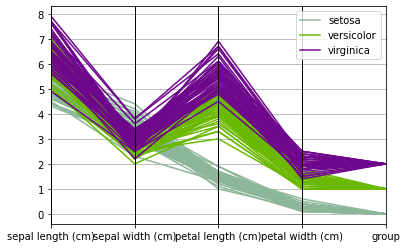

In [29]:
# 서로 구별되는 그룹을 혹인하기 위해 병렬 좌표를 사용하여 모든 데이터 표시!
from pandas.plotting import parallel_coordinates
iris_dataframe['group']=iris.target
iris_dataframe['labels']=[iris.target_names[k] for k in iris_dataframe['group']]
pll=parallel_coordinates(iris_dataframe, 'labels')

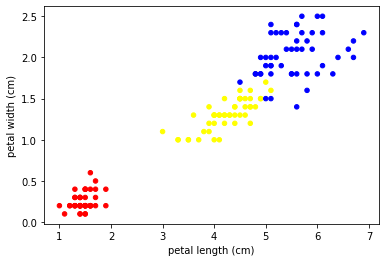

In [33]:
#변수와 다른 변수와의 관계도 살펴볼 수 있음
palette= {0:'red', 1:'yellow', 2:'blue'}
colors=[palette[c] for c in iris_dataframe['group']]

#scatter plot생성
simple_scatterplot=iris_dataframe.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c=colors)

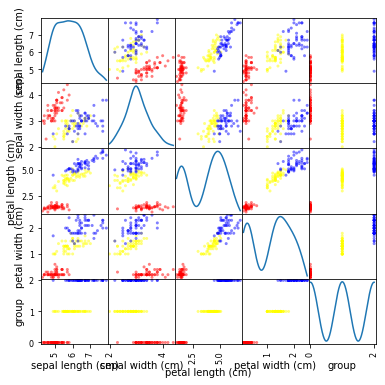

In [34]:
# iris 모든 데이터 집합에 대해 그려보기
from pandas.plotting import scatter_matrix
palette= {0:'red', 1:'yellow', 2:'blue'}
colors=[palette[c] for c in iris_dataframe['group']]
matrix_of_scatterplots=scatter_matrix(iris_dataframe, figsize=(6,6), color=colors, diagonal='kde')

## Correlations

In [35]:
#공분산
iris_dataframe.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
group,0.530872,-0.152349,1.372483,0.597315,0.671141


In [38]:
#상관관계
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
group,0.782561,-0.426658,0.949035,0.956547,1.000000
